# Single analysis notebook

This notebook aims to create enviroment to simply test strategies developed in Stocks & Loss system for python

In [17]:
# imports 
from scraper import stock_daily
from analyzer import Analyzer
from IPython.display import display
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import indicators as ind
import warnings

warnings.filterwarnings('ignore')

## Settings
* Select stock ticker
* Define buy and sell strategy (buystrat and sellstrat)
* Define if you want to run stop loss and what value
* Same with profit taker

In [18]:
xls = pd.ExcelFile('TickerPerSector.xls')
# stop loss
sl = True
slval = 0.04
# profit taker
pt = False
ptval = 0.2
# repeteated buys
rb = False

## Running calculation

In [19]:

fundTickers = pd.DataFrame()
Tickers = pd.DataFrame()
fundTickers["Fund/sector name"] = xls.sheet_names
# Tickers = pd.DataFrame(,columns=funTickers["Index fund name"])
for i in range(len(xls.sheet_names)):
    sheet1 = pd.read_excel(xls, i)
    fundTickers.loc[i,["Fund/sector ticker"]] = sheet1.columns[1]
    Tickers[fundTickers.loc[i,["Fund/sector name"]]] = sheet1[sheet1.columns[1]][1:]
pd.set_option('display.expand_frame_repr', False)    
# display(Tickers)
# I have the initialization here on purpose, to measure its impact
col = ["Ticker", "Trades", "Good trades", "Profit[%]", "Profit[$]", "Hold[%]"]
results = [None] * Tickers.columns.shape[0]
for k in range(Tickers.columns.shape[0]):
    # when I tried to initialize results as [dataframe] * 10 it created list of identical dataframes and when i changed one, it changed them all. Interesting
    results[k] = pd.DataFrame(data=np.zeros([Tickers.shape[0], len(col)]),columns=col)
# iterate over columns
i = 0 
for label, tic in Tickers.iteritems():
    print(label)
    # iterate over items in sectors / indexes
    for j, val in tic.iteritems():
        # j starts at 1, instead of usual 0 => reason why there is -1 everywhere
        # analyze stock
        try:
            stock = stock_daily(val, save=False)
            trades = Analyzer(ticker=val,data=stock.data)
            SMA = 200
            bounces = trades.bouncesFrom_SMA(SMA)
            smaLine=ind.sma(stock.data,SMA,price="Close")["SMA"]
            dropsBelowSMA = np.where(stock.data["Close"][-200:]-smaLine[-200:]<0)[0]  #we look at stock that are above the given SMA line for the past 100 days
            if bounces.size>1 and dropsBelowSMA.size == 0 and (stock.data["Close"].iat[-1]-smaLine.iat[-1])/smaLine.iloc[-1]<0.05: #previous bounces from SMA, above SMA for 100 days and just above SMA the previous day
                print(stock.ticker,"had",bounces.size,"bounces from ",SMA,"SMA in the past 200 days and is currently <5% higher.")           
            SMA = 150
            bounces = trades.bouncesFrom_SMA(SMA)
            smaLine=ind.sma(stock.data,SMA,price="Close")["SMA"]
            dropsBelowSMA = np.where(stock.data["Close"][-200:]-smaLine[-200:]<0)[0]
            if bounces.size>1 and dropsBelowSMA.size == 0 and (stock.data["Close"].iat[-1]-smaLine.iat[-1])/smaLine.iat[-1]<0.05:
                print(stock.ticker,"had",bounces.size,"bounces from ",SMA,"SMA in the past 200 days and is currently <5% higher.")           
            SMA = 100
            bounces = trades.bouncesFrom_SMA(SMA)
            smaLine=ind.sma(stock.data,SMA,price="Close")["SMA"]
            dropsBelowSMA = np.where(stock.data["Close"][-200:]-smaLine[-200:]<0)[0]
            if bounces.size>1 and dropsBelowSMA.size == 0 and (stock.data["Close"].iat[-1]-smaLine.iat[-1])/smaLine.iat[-1]<0.05:
                print(stock.ticker,"had",bounces.size,"bounces from ",SMA,"SMA in the past 200 days and is currently <5% higher.") 
            SMA = 50
            bounces = trades.bouncesFrom_SMA(SMA)
            smaLine=ind.sma(stock.data,SMA,price="Close")["SMA"]
            dropsBelowSMA = np.where(stock.data["Close"][-200:]-smaLine[-200:]<0)[0]
            if bounces.size>1 and dropsBelowSMA.size == 0 and (stock.data["Close"].iat[-1]-smaLine.iat[-1])/smaLine.iat[-1]<0.05:
                print(stock.ticker,"had",bounces.size,"bounces from ",SMA,"SMA in the past 200 days and is currently <5% higher.")                  
            SMA = 26
            bounces = trades.bouncesFrom_SMA(SMA)
            smaLine=ind.sma(stock.data,SMA,price="Close")["SMA"]
            dropsBelowSMA = np.where(stock.data["Close"][-200:]-smaLine[-200:]<0)[0]
            if bounces.size>1 and dropsBelowSMA.size == 0 and (stock.data["Close"].iat[-1]-smaLine.iat[-1])/smaLine.iat[-1]<0.05:
                print(stock.ticker,"had",bounces.size,"bounces from ",SMA,"SMA in the past 200 days and is currently <5% higher.")       
            SMA = 13
            bounces = trades.bouncesFrom_SMA(SMA)
            smaLine=ind.sma(stock.data,SMA,price="Close")["SMA"]
            dropsBelowSMA = np.where(stock.data["Close"][-200:]-smaLine[-200:]<0)[0]
            if bounces.size>1 and dropsBelowSMA.size == 0 and (stock.data["Close"].iat[-1]-smaLine.iat[-1])/smaLine.iat[-1]<0.05:
                print(stock.ticker,"had",bounces.size,"bounces from ",SMA,"SMA in the past 200 days and is currently <5% higher.")       
        except:
            results[i].loc[j-1,["Ticker"]] = val         

Technology
Financial
- BRK.B: No data found, symbol may be delisted
Energy
- CXO: No data found, symbol may be delisted
Industrial
Health Care
Consumer Staples
Materials
Metals & Mining
Biotechnology
Semiconductor
MXIM had 2 bounces from  150 SMA in the past 200 days and is currently <5% higher.
Home Construction
Retail


## Building the trade strategy

In [20]:
# building buy signals
# defining uptrend
up = (ind.ema(stock.data, w=13)["EMA"] > ind.ema(stock.data, w=50)["EMA"]).to_numpy()
# buy signals in uptrend
bsu = np.logical_and(trades.mb_stoch(period=21, sk=3, sd=5, treshold=20), up)
# buy signals in downtrend
bsd = np.logical_and(trades.mb_stoch(period=21, sk=3, sd=5, treshold=50), np.logical_not(up))
# finalize buy signals
bsf = np.logical_or(bsu, bsd)
#buy signal from sma cross

# throw exception if buy signal is empty
if bsf.sum() == 0:
    raise RuntimeError("No buy signals were generated by this strategy.")
# for N buy signals, create N sell vectors where Nth column will be the sell signal for Nth buy signal, 
# some sell methods that are independent will have copied columns
bsf2 = bsf*1
ss = trades.ms_smacross(fast=5, slow=20)

ssf = np.repeat([ss,], repeats=np.sum(bsf), axis=0)
# sort signals 
ss = trades.signalSorter(bsf2,ssf,rb) 

In [21]:
# building final strategy
trades.strategy(ss, stopLoss=sl, stopLossValue=slval, profitTaker=pt, profitTakerValue=ptval)
# evaluating strategy
summary = trades.profit(capitalForEachTrade=400, comission=2)
profitByHolding = 100*((trades.data["Close"].iloc[-1]-trades.data["Close"].iloc[0])/trades.data["Close"].iloc[0])

# dates for plot
# taking stock.data and changing index to column and Date to index
dates = stock.data.copy()
dates["index1"] = dates.index
dates = dates.set_index("Date")

# find index of buy dates of good trades
bdg = summary["Buy date"].where(summary["Good trade?"].astype("bool")).dropna().to_numpy()
sdg = summary["Sell date"].where(summary["Good trade?"].astype("bool")).dropna().to_numpy()
bdg = dates["index1"].reindex(bdg).to_numpy()
sdg = dates["index1"].reindex(sdg).to_numpy()
   
# find index of buy dates of bad trades
bdb = summary["Buy date"].where(~summary["Good trade?"].astype("bool")).dropna().to_numpy()
sdb = summary["Sell date"].where(~summary["Good trade?"].astype("bool")).dropna().to_numpy()
bdb = dates["index1"].reindex(bdb).to_numpy()
sdb = dates["index1"].reindex(sdb).to_numpy()

# Results

In [22]:
print('Absolute profit last year:                ',np.round(summary["Profit[$]"].sum(),2),'$')
print('Relative profit last year:                ',np.round(summary["Profit[%]"].sum(),2),'%')
print('Relative profit by holding last year:     ',np.round(profitByHolding,2),'%')

Absolute profit last year:                 -0.88 $
Relative profit last year:                 -0.22 %
Relative profit by holding last year:      105.08 %


In [23]:
display(summary)

,Buy date,Buy price,Buy value,Position,Sell date,Sell price,Sell value,Comission,Good trade?,Profit[%],Profit[$]
0,2020-09-15,13.646548,400,29.311441,2020-09-21,13.100686,384.000000,2,0.0,-4.500000,-18.000000
1,2020-10-02,12.601364,400,31.742595,2020-10-05,13.597246,431.611880,2,1.0,7.402970,29.611880
2,2021-03-29,22.054190,400,18.137143,2021-03-30,23.016520,417.453915,2,1.0,3.863479,15.453915
3,2021-06-22,26.379999,400,15.163003,2021-06-23,26.809999,406.520096,2,1.0,1.130024,4.520096
4,2021-07-01,26.410000,400,15.145778,2021-07-02,25.740000,389.852327,2,0.0,-3.036918,-12.147673
5,2021-07-09,24.910000,400,16.057808,2021-07-12,24.889999,399.678836,2,0.0,-0.580291,-2.321164
6,2021-07-21,22.469999,400,17.801514,2021-07-22,21.571199,384.000000,2,0.0,-4.500000,-18.000000


## Visualizations

Successful trades are showcased as a light green fill, similarly, failed trades as a red fill

NameError: name 'ticker' is not defined

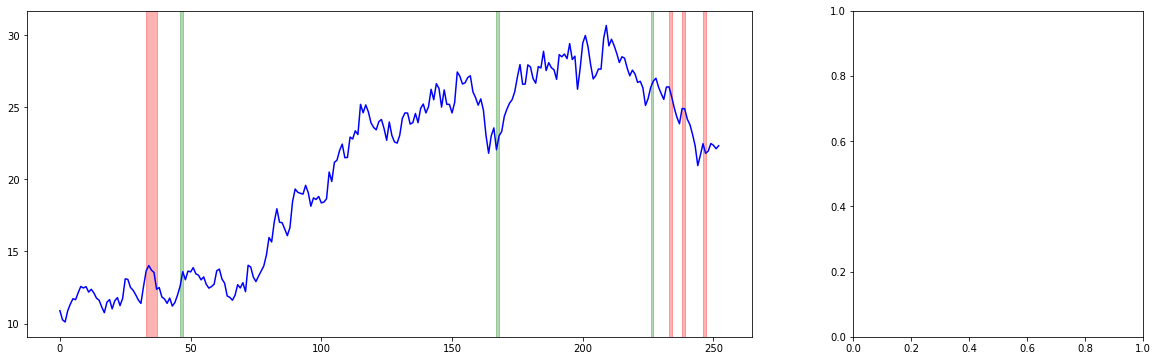

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6), gridspec_kw={'width_ratios': [2.5, 1]})

# plot closed prices and highlighted trades
ax[0].plot(stock.data["Close"], color="b")
for i, val in enumerate(bdg):
    ax[0].axvspan(val, sdg[i], alpha=0.3, color="g")
for i, val in enumerate(bdb):
    ax[0].axvspan(val, sdb[i], alpha=0.3, color="r")
ax[0].set_title(ticker + ": Overview of trades", fontsize=20)
ax[0].set_ylabel("Close price [USD]", fontsize=16)
ax[0].set_xlabel("Index [-]", fontsize=16)

gtrades = summary["Good trade?"].sum()
trades = summary["Good trade?"].size
# plot piechart with percentage of succesful trades (profit / loss)
ax[1].pie([gtrades, trades-gtrades], colors=["g","r"], shadow=True, explode=(0.1, 0), autopct="%1.1f%%")
ax[1].set_title("Success rate of trades", fontsize=20)

fig.tight_layout()

Text(0.5, 0, 'Index [-]')

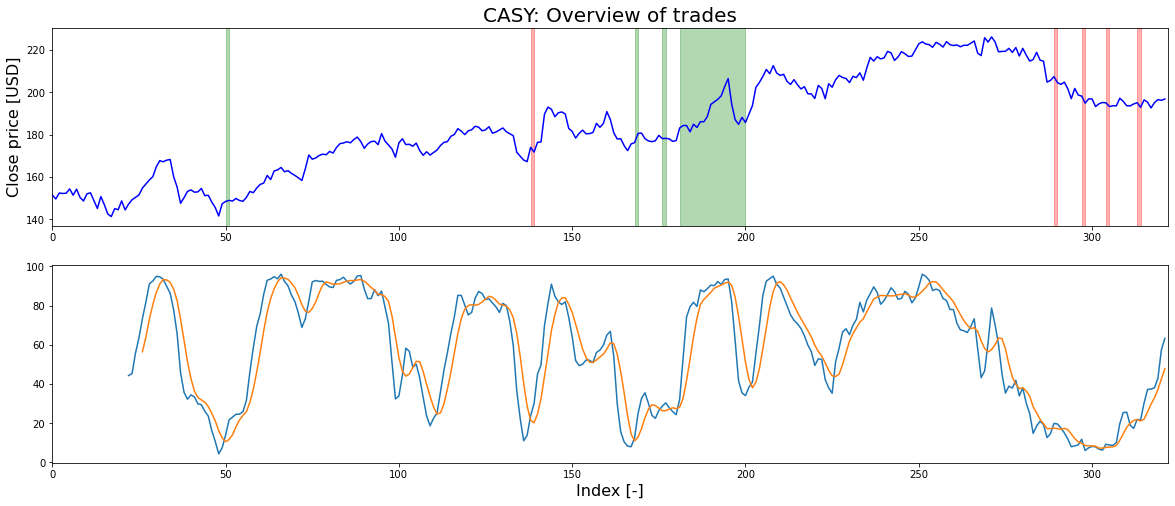

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(20,8))

# plot closed prices and highlighted trades
ax[0].plot(stock.data["Close"], color="b")
for i, val in enumerate(bdg):
    ax[0].axvspan(val, sdg[i], alpha=0.3, color="g")
for i, val in enumerate(bdb):
    ax[0].axvspan(val, sdb[i], alpha=0.3, color="r")
ax[0].set_title(ticker + ": Overview of trades", fontsize=20)
ax[0].set_ylabel("Close price [USD]", fontsize=16)
ax[0].set_xlim([0, stock.data.shape[0]])

ax[1].plot(ind.stoch(stock.data, period=21, sk=3, sd=5)["k"])
ax[1].plot(ind.stoch(stock.data, period=21, sk=3, sd=5)["d"])
ax[1].set_xlim([0, stock.data.shape[0]])
ax[1].set_xlabel("Index [-]", fontsize=16)